In [1]:
import pandas as pd
import os,sys,inspect,pickle,json,time,datetime,re,random; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import utils
import matplotlib.pyplot as plt
%matplotlib inline
conf = json.load(open('config_zoo.json'))
#mtype = 'tf_lstm'
mtype = conf['models'].split(',')[0]
TARGET_ORIG = 'activity'
TARGET = TARGET_ORIG
DATA_DIR = 'activity-atactic'


In [23]:
#mtype = 'xgb_220_380_230_7-55_9-67'
#mtype = 'manual2'
mtype = 'lgb'
cols = {}
cols['lgb'] = ['score_train','score_val','score_test_pseudo','normalize','target','fegroup','data','datasize','lambda_l2','lambda_l1','min_gain_to_split','rounds']
cols['xgb'] = ['score_train','score_val','score_test_pseudo','min_child_weight','lambda','alpha','target','fegroup','data','datasize','rounds']
cols['xgb_220_380_230_7-55_9-67'] = ['score_train','score_val','min_child_weight','lambda','alpha','target','fegroup','data','datasize','rounds']
cols['mynn'] = ['score_train','score_val','datasize']
cols['tf'] = ['score_train','score_val','target','datasize','bs']
cols['tf_lstm'] = ['score_train','score_val','batch_size','initial_learning_rate','decay_steps','target','datasize','data','fegroup','past_history','future_target','step','epochs']
cols['manual2'] = ['score_train','score_val','k1','k2','d2','b']
cols['manual'] = ['score_train','score_val','k1','k2','d2','b']

df = pd.read_csv('output/log_'+mtype+'.csv', index_col=0)[cols[mtype]]
df.tail(10)#.sort_values(by=['score_val'])
#df[(df['data']=='v02_add55x5x3roll')&(df['datasize']=='med')].sort_values(by=['score_val']).head(100)#.tail()#

# mtype2 = 'xgb_overfit'
# df = pd.read_csv('output/log_'+mtype2+'.csv', index_col=0)[cols[mtype]]#.tail(100).sort_values(by=['score_val']).head(100)#.tail()#
# df['score_diff']=abs(df['score_train'] - df['score_val'])
# #df.sort_values(by=['score_diff']).tail()
# df.sort_values(by=['score_val'])

,score_train,score_val,score_test_pseudo,normalize,target,fegroup,data,datasize,lambda_l2,lambda_l1,min_gain_to_split,rounds
y2019_11m_17d_08h_40min_04s_450691_,10.799098,11.539796,0.0,1.0,activity,weather,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_40min_05s_222122_,10.799098,11.539796,0.0,1.0,activity,rashod_r1_r2,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_40min_05s_976727_,10.799098,11.539796,0.0,1.0,activity,together,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_41min_22s_007801_,10.799098,11.539796,0.0,1.0,activity,weather,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_41min_52s_912438_,10.853470,9.687245,0.0,1.0,activity,rashod_r1_r2,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_42min_33s_625809_,11.043787,7.412704,0.0,1.0,activity,together,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_45min_12s_339177_,10.853470,9.687245,0.0,1.0,activity,rashod_r1_r2,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_45min_15s_760175_,11.043787,7.412704,0.0,1.0,activity,together,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_45min_16s_612176_,10.799098,11.539796,0.0,1.0,activity,weather,v09_one_month,max,30,5,3,150
y2019_11m_17d_08h_50min_16s_230236_,11.043787,7.412693,0.0,1.0,activity,features_orig,v09_one_month,max,30,5,3,150


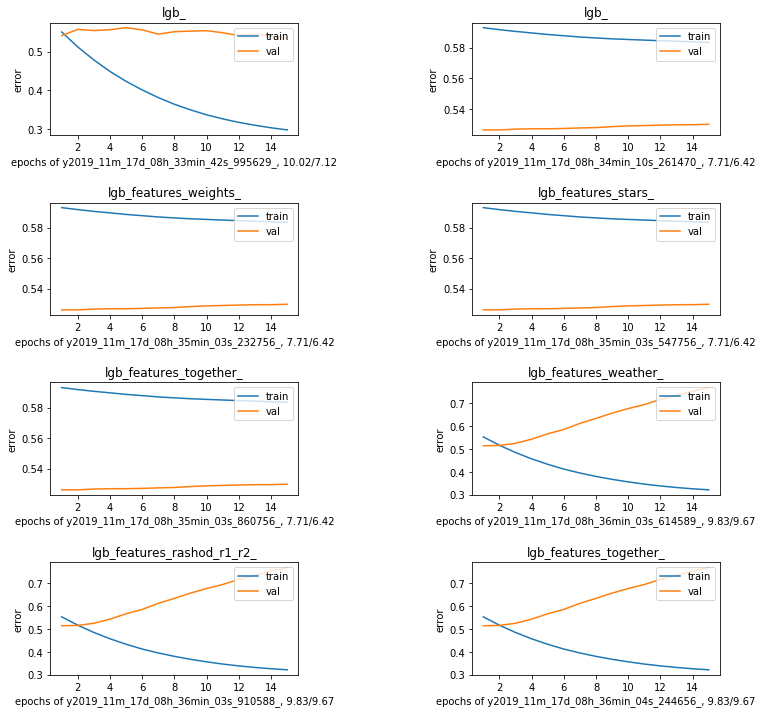

In [3]:
#for mtype in conf['models'].split(','): utils.plot_loss(mtype)
utils.plot_loss(mtype,8)

In [4]:
curr_time = pd.read_csv('output/log_'+mtype+'.csv', index_col=0).index[-1]
def get_trainval():
    FEATURES = utils.rashod_r1
    train_data_orig = pickle.load(open(os.path.join(root,'input',DATA_DIR,conf['data'],'train.pkl'),"rb")) ;print('train_data_orig',train_data_orig.shape)
    train_data = train_data_orig[FEATURES + [TARGET]] ;print('train_data',train_data.shape)
    train, val = utils.split_rows(train_data, conf)
    return train, val
train,val = get_trainval() ;print('train',train.shape, 'val',val.shape)
def last_predictions():
    import numpy as np
    y_train_pred_p = pd.read_csv(os.path.join('output','trainval',curr_time+mtype+'_train_sub.csv'), index_col = 0)
    y_val_pred_p = pd.read_csv(os.path.join('output','trainval',curr_time+mtype+'_val_sub.csv'), index_col = 0)
    return np.array(y_train_pred_p[TARGET]), np.array(y_val_pred_p[TARGET])
y_train_pred, y_val_pred = last_predictions() ;print('y_train_pred',y_train_pred.shape, 'y_val_pred',y_val_pred.shape)
y_train_pred_p = pd.Series(y_train_pred.flatten(), index=train.index, name=TARGET+"_train_pred").sort_index()
y_val_pred_p = pd.Series(y_val_pred.flatten(), index=val.index, name=TARGET+"_val_pred").sort_index() ;print(train["activity"].shape, val["activity"].shape, y_train_pred_p.shape, y_val_pred_p.shape)
#utils.plot_predictions("2018-04-23 06:01:00", "2018-04-23 10:01:00", train, val, y_train_pred_p, y_val_pred_p, title=curr_time)



train_data_orig (42495, 56)
train_data (42495, 7)


TypeError: split_rows() missing 1 required positional argument: 'conf_i'

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame([['2018-02-13 08:30:00'], ['2018-02-13 09:31:00'], ['2018-02-13 10:32:00'], ['2018-02-13 11:33:00'], ['2018-02-13 08:34:00']], columns=['Date'])
df['Val'] = np.random.randn(len(df))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.index = df['Date']
df = df.drop(columns=['Date'])
df

In [ ]:
df2 = pd.DataFrame([['2018-02-13 08:30:00'], ['2018-02-13 09:31:00'], ['2018-02-13 10:32:00'], ['2018-02-13 11:33:00'], ['2018-02-13 08:34:00']], columns=['Date'])
df2['Val'] = np.random.randn(len(df2))
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2.index = df2['Date']
df2 = df2.drop(columns=['Date'])
df2

In [ ]:
pd.concat([df,df2])